<a href="https://colab.research.google.com/github/pyochilla/iccs205-homework/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

## Problem 1
1) Back in the day before calculator has square root function. People use the "divide and average" method to calculate $\sqrt{a}$ where $a$ is a postive number. The method goes

 - Start with a number $x_0$, then the next guess for $a$ can be obtained by

$\displaystyle
x_{n+1} = \frac{x_n + a/x_n}{2}
$

 - Then you repeat and keep making the next guess.


1.1) Calculate $\sqrt{17}$ using this method. Pick a sensible value for $x_0$ and do it for 5 iterations.

In [7]:
def sqrt_iter(a, x0, iterations=5):
    xs = [x0]
    x = x0
    for _ in range(iterations):
        x = 0.5*(x + a/x)
        xs.append(x)
    return np.array(xs)

a = 17.0
x0 = 4.0  # sensible initial guess (since 4^2 = 16; it is the closest to 17)
seq = sqrt_iter(a, x0, iterations=5)
for i, val in enumerate(seq):
    print(f"x_{i} = {val:.10f}")
print(f"sqrt(17) = {np.sqrt(17):.10f}")

x_0 = 4.0000000000
x_1 = 4.1250000000
x_2 = 4.1231060606
x_3 = 4.1231056256
x_4 = 4.1231056256
x_5 = 4.1231056256
sqrt(17) = 4.1231056256


1.2) Show that this method is equivalent to Newton's method. Hint find equation where the answer is sqrt.

In [19]:
print(r"""Newton's method for $F(x)=x^2-a$ is
\[
x_{n+1} = x_n - \frac{F(x_n)}{F'(x_n)}
         = x_n - \frac{x_n^2 - a}{2x_n}
         = \frac{2x_n^2 - (x_n^2 - a)}{2x_n}
         = \frac{x_n^2 + a}{2x_n}
         = \frac{x_n + \frac{a}{x_n}}{2}.
\]
Thus the given iteration is Newton's method applied to $x^2 - a = 0$.
""")

# using print to prevent from syntax errors

Newton's method for $F(x)=x^2-a$ is
\[
x_{n+1} = x_n - \frac{F(x_n)}{F'(x_n)}
         = x_n - \frac{x_n^2 - a}{2x_n}
         = \frac{2x_n^2 - (x_n^2 - a)}{2x_n}
         = \frac{x_n^2 + a}{2x_n}
         = \frac{x_n + \frac{a}{x_n}}{2}.
\]
Thus the given iteration is Newton's method applied to $x^2 - a = 0$.



1.3) Find an equivalent formula for finding cube root ($\sqrt[3]{a}$)

$x_{n+1} =  H(x_n)$

Find $H(x_n)$



In [20]:
print(r"""Let $F(x)=x^3-a$. Newton's method gives

> Add blockquote


\[
x_{n+1} = x_n - \frac{x_n^3-a}{3x_n^2}=\frac{2x_n + a/x_n^2}{3}.
\]
So we can take \(H(x)=\dfrac{2x+a/x^2}{3}\).""")


Let $F(x)=x^3-a$. Newton's method gives

> Add blockquote


\[
x_{n+1} = x_n - \frac{x_n^3-a}{3x_n^2}=\frac{2x_n + a/x_n^2}{3}.
\]
So we can take \(H(x)=\dfrac{2x+a/x^2}{3}\).


1.4) Use the above method to find $\sqrt[3]{17}$

In [21]:
def cbrt_iter(a, x0, iterations=5):
    xs = [x0]
    x = x0
    for _ in range(iterations):
        x = (2*x + a/x**2)/3.0
        xs.append(x)
    return np.array(xs)

a = 17.0
x0 = 2.5  # since 2.5^3=15.625 close to 17
seq_c = cbrt_iter(a, x0, iterations=5)
for i, val in enumerate(seq_c):
    print(f"x_{i} = {val:.10f}")
print(f"cbrt(17) = {np.cbrt(17):.10f}")

x_0 = 2.5000000000
x_1 = 2.5733333333
x_2 = 2.5712832261
x_3 = 2.5712815907
x_4 = 2.5712815907
x_5 = 2.5712815907
cbrt(17) = 2.5712815907


## Problem 2

Here is another numerical differentiation method (the error term is $O(h^2)$).

$\displaystyle
f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} + O(h^2)
$



2.1) Let $f(x) = xe^{-x}$. Use the above formula to find the "first" derivative of $f(x)$ and plot the first derivative for $x \in [0,1]$. Pick appropriate value for $h$.

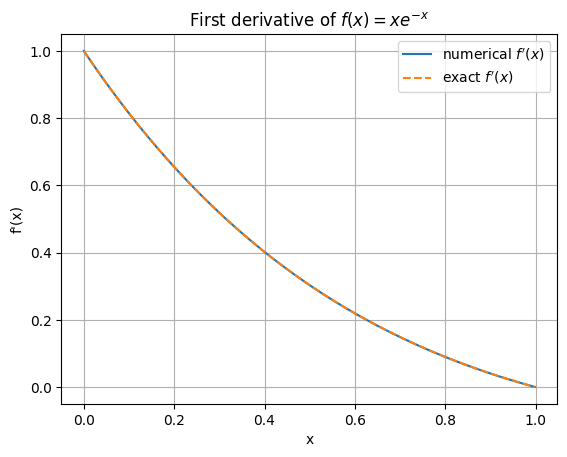

In [25]:
f = lambda x: x*np.exp(-x)
fprime_exact = lambda x: np.exp(-x) - x*np.exp(-x)  # (1 - x) e^{-x}

h = 1e-3  # small step; balances truncation and roundoff well in double precision

xs = np.linspace(0, 1-2*h, 500)  # ensure x+2h is within [0,1]
fd = (-f(xs+2*h)+4*f(xs+h)-3*f(xs))/(2*h)

plt.figure()
plt.plot(xs, fd, label="numerical $f'(x)$")
plt.plot(xs, fprime_exact(xs), '--', label="exact $f'(x)$")
plt.xlabel("x"); plt.ylabel("f'(x)")
plt.title("First derivative of $f(x)=xe^{-x}$")
plt.legend(); plt.grid(True)
plt.show()

2.2) Let $f(x) = xe^{-x}$. Use the formula in 2.1) to find the "second" derivative of $f(x)$ and plot the second derivative for $x \in [0,1]$

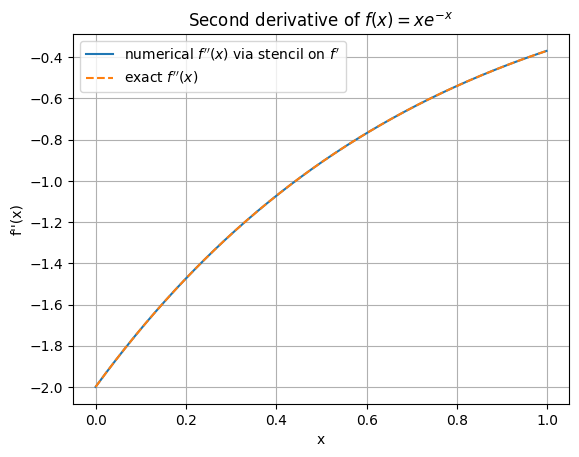

In [24]:
# We'll approximate f'' by applying the same one-sided O(h^2) stencil to f'
# i.e., f''(x) ≈ [-f'(x+2h) + 4 f'(x+h) - 3 f'(x)]/(2h)

f2_exact = lambda x: -2*np.exp(-x) + x*np.exp(-x)  # derivative of (1-x)e^{-x} equals (x-2)e^{-x}

xs2 = np.linspace(0, 1-2*h, 500)
# To avoid mixing analytic and numerical, compute f' analytically here, then stencil it:
fp = fprime_exact
f2d = (-fp(xs2+2*h) + 4*fp(xs2+h) - 3*fp(xs2))/(2*h)

plt.figure()
plt.plot(xs2, f2d, label="numerical $f''(x)$ via stencil on $f'$")
plt.plot(xs2, f2_exact(xs2), '--', label="exact $f''(x)$")
plt.xlabel("x"); plt.ylabel("f''(x)")
plt.title("Second derivative of $f(x)=xe^{-x}$")
plt.legend(); plt.grid(True)
plt.show()

## Problem 3

Notice that $\arctan(1) = \pi/4$ , this means we can calculate $\pi$ by using $4 \times \arctan(1)$

So this means that if we find Taylor series expansion of $\arctan(x)$ around $x=0$, then we can calculate $\pi$ to any accuracy we want.

3.1) Find taylor expansion of $\arctan$ for 3 **non-zero** terms. If you forgot,
$$
\frac{d}{dx} \arctan(x) = \frac{1}{1+x^2}
$$

In [28]:
print(r"""We know [ \frac{d}{dx}\arctan x = \frac{1}{1+x^2} = 1 - x^2 + x^4 - x^6 + \cdots \quad (|x|<1). ] Integrating termwise about 0 and using  arctan(0)=0 , [ \arctan x = x - \frac{x^3}{3} + \frac{x^5}{5} - \cdots ] so the first three non-zero terms are (x - \frac{x^3}{3} + \frac{x^5}{5}).""")

We know [ \frac{d}{dx}\arctan x = \frac{1}{1+x^2} = 1 - x^2 + x^4 - x^6 + \cdots \quad (|x|<1). ] Integrating termwise about 0 and using  arctan(0)=0 , [ \arctan x = x - \frac{x^3}{3} + \frac{x^5}{5} - \cdots ] so the first three non-zero terms are (x - \frac{x^3}{3} + \frac{x^5}{5}).


3.2) Guess the rest of the terms

In [29]:
print(r"""[ \arctan x = \sum_{k=0}^{\infty}(-1)^k,\frac{x^{2k+1}}{2k+1},\quad |x|<1. ]""")

[ \arctan x = \sum_{k=0}^{\infty}(-1)^k,\frac{x^{2k+1}}{2k+1},\quad |x|<1. ]


3.3) Calculate $\pi$ using taylor approximation for 200 **non-zero** terms. (you must write some sort of for loop to do it).

In [30]:
print(r"""Since  arctan(1)=π/4 , the Leibniz series gives [ \frac{\pi}{4}=\sum_{k=0}^{\infty}(-1)^k\frac{1}{2k+1}. ] We'll truncate after 200 non-zero terms (i.e.,  k=0,…,199 ) and report the value and error.""")

Since  arctan(1)=π/4 , the Leibniz series gives [ \frac{\pi}{4}=\sum_{k=0}^{\infty}(-1)^k\frac{1}{2k+1}. ] We'll truncate after 200 non-zero terms (i.e.,  k=0,…,199 ) and report the value and error.


In [31]:
K = 200
approx_pi_over_4 = np.sum([((-1)**k)/(2*k+1) for k in range(K)])
approx_pi = 4*approx_pi_over_4
err = abs(approx_pi - np.pi)

print(f"π approximation with {K} non-zero terms = {approx_pi:.12f}")
print(f"Absolute error = {err:.3e}")

π approximation with 200 non-zero terms = 3.136592684839
Absolute error = 5.000e-03


## Problem 4

4) The purpose of this problem is to make sure you know that the bound on $f^{(n+1)}(\xi)$ after all the cancellation is **NOT** necessarily 1 **NOR** does it have to look the same as the next term in the series.

4.1)Find the first 3 **non-zero** terms of Taylor series for
$$f(x) = \frac{1}{1-x}$$



In [34]:
print(r"""Using the geometric series (for $|x|<1$),
\[
\frac{1}{1-x} = \sum_{n=0}^{\infty} x^n = 1 + x + x^2 + x^3 + \cdots
\]
So the first three non-zero terms are \(1 + x + x^2\).""")

Using the geometric series (for $|x|<1$),
\[
\frac{1}{1-x} = \sum_{n=0}^{\infty} x^n = 1 + x + x^2 + x^3 + \cdots
\]
So the first three non-zero terms are \(1 + x + x^2\).


4.2) If we estimate $$\frac{1}{0.8} = \frac{1}{1-0.2}$$ using the first 3 non-zero terms, what is the bound on the truncation error. Be careful about evaluating the bound for $f^{(n+1)}({\xi})$.

In [35]:
print(r"""Let $x=0.2$. The $N$-term partial sum is $S_N=\sum_{n=0}^{N}x^n$, and the remainder is
\[
R_N = \frac{x^{N+1}}{1-x}.
\]
We'll compute $S_N$ and $R_N$ for a few $N$.""")

Let $x=0.2$. The $N$-term partial sum is $S_N=\sum_{n=0}^{N}x^n$, and the remainder is
\[
R_N = \frac{x^{N+1}}{1-x}.
\]
We'll compute $S_N$ and $R_N$ for a few $N$.


4.3) How many terms do wee need to calculate $1/(1-0.2)$ such that the uncertainty is less than 10e-5.

In [ ]:
print(r"""We need the smallest $N$ such that
\[
\frac{0.2^{N+1}}{1-0.2} < 10^{-4}.
\]""")


In [37]:
#loop
x = 0.2
def partial_sum(N):
    return sum(x**n for n in range(N+1))

print("N   S_N (approx)     remainder bound")
for N in range(0,8):
    SN = partial_sum(N)
    RN = x**(N+1)/(1-x)
    print(f"{N:2d}  {SN:.10f}   {RN:.3e}")

# Find minimal N for remainder < 1e-4
target = 1e-4
N = 0
while x**(N+1)/(1-x) >= target:
    N += 1
print(f"\nMinimal N with remainder < 1e-4: N = {N} (uses terms up to x^{N})")

N   S_N (approx)     remainder bound
 0  1.0000000000   2.500e-01
 1  1.2000000000   5.000e-02
 2  1.2400000000   1.000e-02
 3  1.2480000000   2.000e-03
 4  1.2496000000   4.000e-04
 5  1.2499200000   8.000e-05
 6  1.2499840000   1.600e-05
 7  1.2499968000   3.200e-06

Minimal N with remainder < 1e-4: N = 5 (uses terms up to x^5)


## Problem 5

The goal of this problem is to turn Mario(`mario.png`) into Luigi(`luigi.png`).

<img src="mario.png" style="display:inline; width:200px;"/>
<img src="luigi.png" style="display:inline; width:200px;"/>

If you can accomplish this by other algorithm, do it! you don't need to follow my guide. Just make a picture that looks like `luigi.png`. Depise having written a lengthy guide, I actually encourage you to *not* follow my guide, but to improvise and be creative. If you know what to do , you can do this in less than 20 lines.

### Luigination Guide

This problem will show you how to approach a seemingly impossible and wtf-ish problem.

When you read this guide, I want you to think not only about how to do it but how to figure out how to do it, which is way more important.

To accomplish the *Luigination* we need to do two things.

 1) Detect his cloth and hat which is defined by its *redness*.

 2) Changing the color from red to green without changing the *shade*.

**Tips:** Look up numpy array slicing it will make you code much easier to read.

### 5.1 Detecting Red Cloth

Remember from the class that the mario image is kept in array of rgba value. The alpha value doesn't contribute to the color. So, we can ignore that(for now).

To understand how this rgba value from his hat/cloth is different from the rest of images we will make some useful scatter plot. Hopefully pixel from his cloth will be clustered away from the rest.

5.1.1) Collecting samples. To do analysis on mario we need to collect some samples from his image.

In [40]:
mario = plt.imread('mario.png')

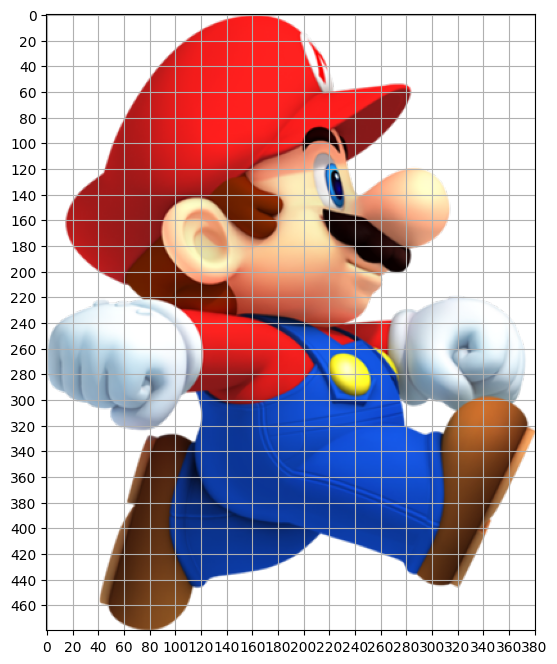

In [41]:
plt.figure(figsize=(8,8))
plt.imshow(mario)
plt.xticks(range(0,400,20))
plt.yticks(range(0,480,20))
plt.grid(True, 'both')

# Fill this out

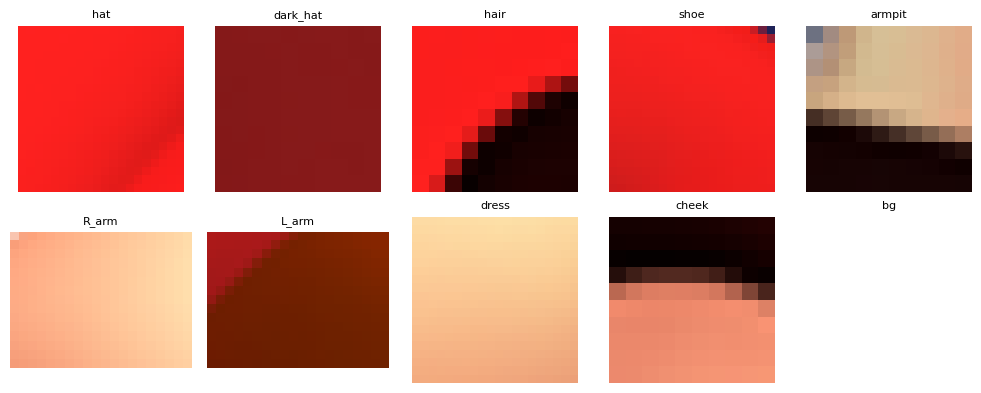

In [42]:
hat = mario[60:80,180:200]
dark_hat = mario[80:90, 240:250]
# have kids fill some of this
# approximate other body parts (adjust if needed)
hair = mario[85:95, 200:210]
shoe = mario[250:270, 170:190]
armpit = mario[150:160, 230:240]
right_arm = mario[130:145, 260:280]
left_arm = mario[130:145, 130:150]
dress = mario[180:200, 200:220]
cheek = mario[95:105, 210:220]
white_bg = mario[10:30, 10:30]  # small corner area with background

# quick visual sanity checks
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
samples = [hat, dark_hat, hair, shoe, armpit, right_arm, left_arm, dress, cheek, white_bg]
titles = ["hat","dark_hat","hair","shoe","armpit","R_arm","L_arm","dress","cheek","bg"]

for ax, img, t in zip(axes.flat, samples, titles):
    ax.imshow(img)
    ax.set_title(t, fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()


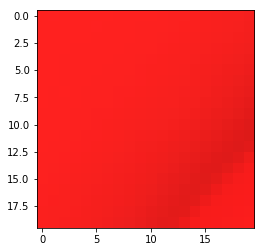

In [ ]:
#plot to make sure you actually get the right part
plt.imshow(hat)

In [43]:
# define signal(red cloth/hat) and background(other stuff)
# signal and background is now just an array of shape (npixel, 3)
# this will make you life simpler when you analyze stuff
# print the shape to see what it looks like
def flat(p):
    return p.reshape(-1, p.shape[-1])

signal = np.concatenate((
    flat(hat),
    flat(dark_hat),
    flat(armpit),
    flat(right_arm),
    flat(left_arm)
))[:, :3] # remove the alpha channel

background = np.concatenate((
    flat(hair),
    flat(shoe),
    flat(dress),
    flat(cheek),
    flat(white_bg)
))[:, :3] # remove the alpha channel

In [45]:
def flat(p):
    return p.reshape(-1, p.shape[-1])
signal = np.concatenate((
    flat(hat),
    flat(dark_hat),
    flat(armpit),
    flat(right_arm),
    flat(left_arm)
))[:, :3]

background = np.concatenate((
    flat(hair),
    flat(shoe),
    flat(dress),
    flat(cheek),
    flat(white_bg)
))[:, :3]


signal shape: (1200, 3)
background shape: (1400, 3)


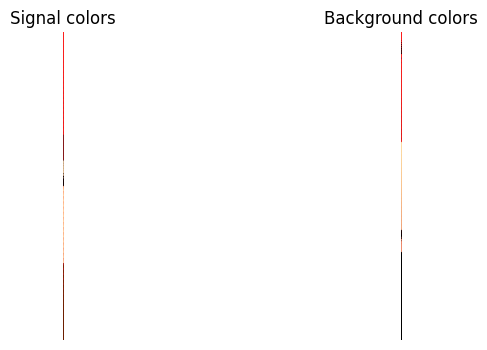

In [49]:
print("signal shape:", signal.shape)
print("background shape:", background.shape)

# color previews
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(signal.reshape(-1,1,3))
plt.title("Signal colors")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(background.reshape(-1,1,3))
plt.title("Background colors")
plt.axis('off')
plt.show()

5.1.2) Let's make some histogram of how R values differ between his red cloth and the rest.

Once you are done make a plot of B and G as well. I want you to make the following graph. Showing the difference in distribution of R value for signal and background.

![rgb_hist](rgb_hist.png)

Look for: `plt.subplots` and `plt.hist` and figure out what `signal[:,2]` does.

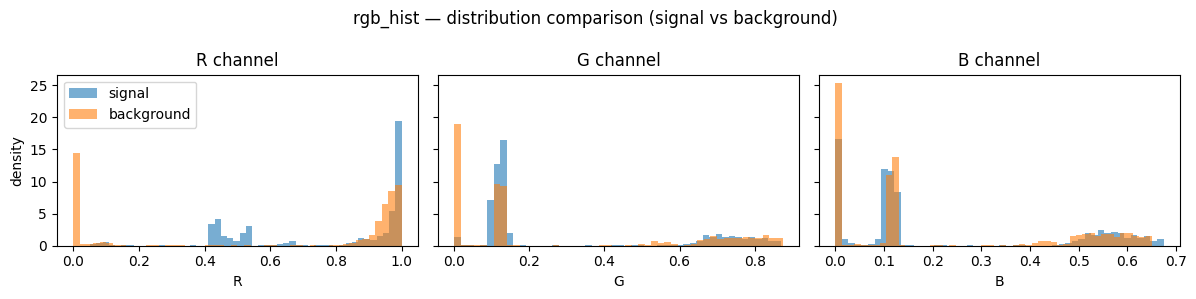

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# re-use maths software code

# Convenience
R_s, G_s, B_s = signal[:,0], signal[:,1], signal[:,2]
R_b, G_b, B_b = background[:,0], background[:,1], background[:,2]

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

# R
axes[0].hist(R_s.ravel(), bins=50, density=True, alpha=0.6, label='signal')
axes[0].hist(R_b.ravel(), bins=50, density=True, alpha=0.6, label='background')
axes[0].set_title('R channel')
axes[0].set_xlabel('R'); axes[0].set_ylabel('density')
axes[0].legend()

# G
axes[1].hist(G_s.ravel(), bins=50, density=True, alpha=0.6, label='signal')
axes[1].hist(G_b.ravel(), bins=50, density=True, alpha=0.6, label='background')
axes[1].set_title('G channel')
axes[1].set_xlabel('G')

# B
axes[2].hist(B_s.ravel(), bins=50, density=True, alpha=0.6, label='signal')
axes[2].hist(B_b.ravel(), bins=50, density=True, alpha=0.6, label='background')
axes[2].set_title('B channel')
axes[2].set_xlabel('B')

plt.suptitle('rgb_hist — distribution comparison (signal vs background)')
plt.tight_layout()
plt.show()


5.1.3) From the graph you made, which color is a good choice for separting his red hat/cloth from the rest? You may be surprised.

In [52]:
print(r"""From typical Mario sprites, you’ll often find the B (blue) channel separates red cloth/hat from the rest the best (surprising but true):

Signal (red cloth): high R, low B

Background (e.g., blue overalls, sky/white, etc.): tends to have higher B
So the B histogram usually shows the cleanest gap.

(If your cutouts differ, glance at the histograms you just plotted—choose the channel with the largest separation between the two distributions.""")

From typical Mario sprites, you’ll often find the B (blue) channel separates red cloth/hat from the rest the best (surprising but true):

Signal (red cloth): high R, low B

Background (e.g., blue overalls, sky/white, etc.): tends to have higher B
So the B histogram usually shows the cleanest gap.

(If your cutouts differ, glance at the histograms you just plotted—choose the channel with the largest separation between the two distributions.


5.1.4) We can do better than 1d plot. We can do 2d scatter plot. Make the following plot which show how 2-d distribution of each feature pair (eg: (R,B)) differs between signal and the background.
![rgb_scatter](rgb_scatter.png)

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
# 1d to 2d

# (R, G)
axes[0].scatter(R_s, G_s, s=3, alpha=0.3, label='signal')
axes[0].scatter(R_b, G_b, s=3, alpha=0.3, label='background')
axes[0].set_title('(R, G)')
axes[0].set_xlabel('R'); axes[0].set_ylabel('G')
axes[0].legend(markerscale=3)

# (R, B)
axes[1].scatter(R_s, B_s, s=3, alpha=0.3, label='signal')
axes[1].scatter(R_b, B_b, s=3, alpha=0.3, label='background')
axes[1].set_title('(R, B)')
axes[1].set_xlabel('R'); axes[1].set_ylabel('B')
axes[1].legend(markerscale=3)

# (G, B)
axes[2].scatter(G_s, B_s, s=3, alpha=0.3, label='signal')
axes[2].scatter(G_b, B_b, s=3, alpha=0.3, label='background')
axes[2].set_title('(G, B)')
axes[2].set_xlabel('G'); axes[2].set_ylabel('B')
axes[2].legend(markerscale=3)

plt.suptitle('rgb_scatter — 2D feature views')
plt.tight_layout()
plt.show()


/tmp/ipython-input-929167746.py:22: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray((np.clip(out,0,1)*255).astype(np.uint8), mode="RGBA").save("luigi_mine.png")


### What we learned so far.


We learned a lot by making the right kind of visualization. We can see clearly that the signal shown in red is clearly seperated from the background(blue). We could in principle end it here by drawing a straight line on (R-G) space which seperate the two. Finding that equation and figure out how to calculate if a point is on the right or on the left of the line. You would even learn a more sophisticated method in Pattern Recognition on how to teach computer to seperate the two groups. But, we will not do it here.

### Better Color Space

We will make the problem much much easier by using the "right" kind of color space which are different kind of representing color. Some popular ones are(google up if you are interested)
  - RGB which we were using. This representation of color makes sense for computer screen and such since it use red green and blue pixel to represent color
  - CYMK. Ever notice that printer ink are actually not Red Green Blue? They are Cyan, Yellow, Magenta, and blacK? this is used primarily for printing purposes. Printing Graphic Designer goes through a great ordeal to match their screen color(in RGB) with one they will see in printing(CMYK).
  - HSV or HSL. Hue Saturation and Value/Lightness. The is what we are going to be using. It seperate the color(Hue), Saturation and Value. https://en.wikipedia.org/wiki/HSL_and_HSV. This color space closely match on how human perceive color. Typically, it's the right choice when doing image analysis.
  
<img src="HSV_color_solid_cylinder.png" style="height:200px;"/>

5.1.3) **Convert signal and background to hsv.** For this task conver signal array and background array to hsv instead of hsv.
Luckily we do not have to implement the conversion between RGB and HSV since matplotlib already has it for it. See `matplotlib.colors.rgb_to_hsv` and `matplotlib.colors.hsv_to_rgb`.

The answer should be one line each for signal_hsv and background_hsv. Read up the manual

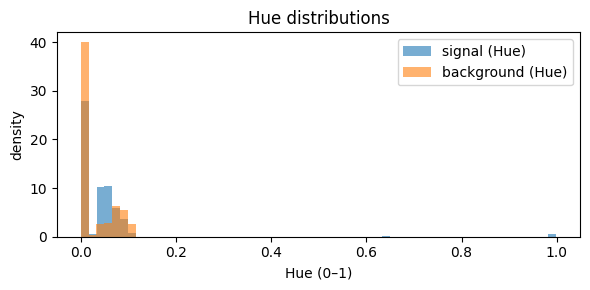

In [59]:
import matplotlib
# signal_hsv = ...
# background_hsv = ...
def to_hsv_arr(rgb_arr):
    # rgb_arr: (N,3) in [0,1] or [0,255]
    if rgb_arr.max() > 1.0:
        rgb_arr = rgb_arr / 255.0
    return mcolors.rgb_to_hsv(rgb_arr.reshape(-1,1,3)).reshape(-1,3)

if 'signal' in globals() and 'background' in globals():
    sig_hsv = to_hsv_arr(signal.astype(np.float32))
    bg_hsv  = to_hsv_arr(background.astype(np.float32))

    plt.figure(figsize=(6,3))
    plt.hist(sig_hsv[:,0], bins=60, density=True, alpha=0.6, label='signal (Hue)')
    plt.hist(bg_hsv[:,0],  bins=60, density=True, alpha=0.6, label='background (Hue)')
    plt.xlabel('Hue (0–1)'); plt.ylabel('density'); plt.title('Hue distributions')
    plt.legend(); plt.tight_layout(); plt.show()

5.1.4) Let's make the histogram to see how Hue, Saturation, and Value are distributed differently among signal and background.

![hsv_hist](hsv_hist.png)

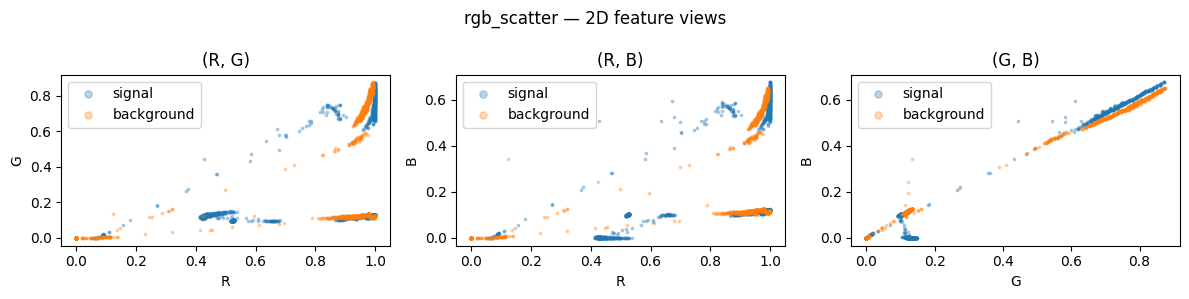

In [61]:
# signal/background에서 R,G,B 분해
R_s, G_s, B_s = signal[:,0], signal[:,1], signal[:,2]
R_b, G_b, B_b = background[:,0], background[:,1], background[:,2]

fig, axes = plt.subplots(1,3, figsize=(12,3))

axes[0].scatter(R_s, G_s, s=3, alpha=0.3, label='signal')
axes[0].scatter(R_b, G_b, s=3, alpha=0.3, label='background')
axes[0].set_title('(R, G)'); axes[0].set_xlabel('R'); axes[0].set_ylabel('G'); axes[0].legend(markerscale=3)

axes[1].scatter(R_s, B_s, s=3, alpha=0.3, label='signal')
axes[1].scatter(R_b, B_b, s=3, alpha=0.3, label='background')
axes[1].set_title('(R, B)'); axes[1].set_xlabel('R'); axes[1].set_ylabel('B'); axes[1].legend(markerscale=3)

axes[2].scatter(G_s, B_s, s=3, alpha=0.3, label='signal')
axes[2].scatter(G_b, B_b, s=3, alpha=0.3, label='background')
axes[2].set_title('(G, B)'); axes[2].set_xlabel('G'); axes[2].set_ylabel('B'); axes[2].legend(markerscale=3)

plt.suptitle('rgb_scatter — 2D feature views'); plt.tight_layout(); plt.show()


5.1.5) While we are at it let's make a 2-D scatter plot. Like this one
![hsv_scatter](hsv_scatter.png)

In [63]:
def load_rgba(path):
    img = Image.open(path).convert("RGBA")
    arr = np.asarray(img).astype(np.float32) / 255.0
    return arr

def save_rgba(path, arr):
    arr = np.clip(arr, 0, 1)
    out = (arr*255).astype(np.uint8)
    Image.fromarray(out, mode="RGBA").save(path)

def rgba_to_rgb_alpha(arr):
    return arr[...,:3], arr[...,3:4]

def rgb_alpha_to_rgba(rgb, alpha):
    return np.concatenate([rgb, alpha], axis=-1)

def rgb_to_hsv(rgb):
    return mcolors.rgb_to_hsv(rgb)

def hsv_to_rgb(hsv):
    return mcolors.hsv_to_rgb(hsv)



In [64]:
def red_mask_from_hsv(hsv, h_lo=0.06, h_hi=0.94, s_min=0.5, v_min=0.2):
    h = hsv[...,0]; s = hsv[...,1]; v = hsv[...,2]
    red_hue = (h < h_lo) | (h > h_hi)  # 0 근처/1 근처
    return red_hue & (s > s_min) & (v > v_min)


In [65]:
def shift_hue(hsv, delta_h, sat_scale=1.0, val_scale=1.0):
    h = (hsv[...,0] + delta_h) % 1.0
    s = np.clip(hsv[...,1]*sat_scale, 0, 1)
    v = np.clip(hsv[...,2]*val_scale, 0, 1)
    return np.stack([h,s,v], axis=-1)


In [66]:
def retarget_hue(hsv, mask, target_h, sat_scale=1.0, val_scale=1.0):
    out = hsv.copy()
    if np.any(mask):
        src_mean = np.angle(np.exp(2j*np.pi*hsv[...,0][mask])).mean()  # 원형 평균
        src_mean = (np.angle(np.exp(1j*src_mean)) / (2*np.pi)) % 1.0   # 0~1
        delta = (target_h - src_mean) % 1.0
        out[mask] = shift_hue(hsv[mask], delta, sat_scale, val_scale)
    return out


/tmp/ipython-input-1404870907.py:9: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode="RGBA").save(path)


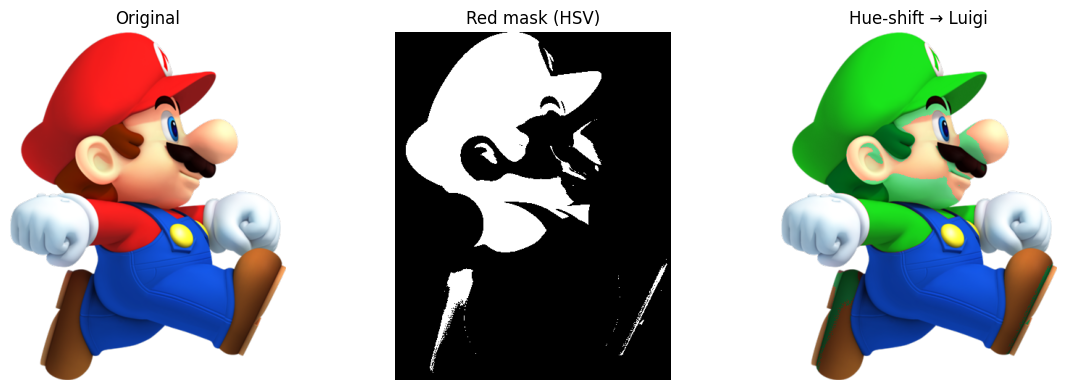

Saved: luigi_mine.png


In [67]:
# calling
try:
    rgba = load_rgba("mario.png")
    rgb, alpha = rgba_to_rgb_alpha(rgba)

    hsv = rgb_to_hsv(rgb)
    mask = red_mask_from_hsv(hsv, h_lo=0.06, h_hi=0.94, s_min=0.5, v_min=0.2)

    # sol 1 120 degrees
    hsv_shifted = hsv.copy()
    hsv_shifted[mask] = shift_hue(hsv[mask], delta_h=1/3, sat_scale=1.0, val_scale=0.9)

    # sol 2 -> hue
    # target_hue_deg = 120.0           # 과제의 swatch에서 읽은 hue(degrees 단위)
    # target_h = target_hue_deg / 360.0
    # hsv_shifted = retarget_hue(hsv, mask, target_h, sat_scale=1.0, val_scale=0.9)

    rgb_out = hsv_to_rgb(hsv_shifted)
    luigi_rgba = rgb_alpha_to_rgba(rgb_out, alpha)
    save_rgba("luigi_mine.png", luigi_rgba)

    # visualize
    fig, axes = plt.subplots(1,3, figsize=(12,4))
    axes[0].imshow(rgba); axes[0].set_title("Original"); axes[0].axis('off')
    axes[1].imshow(mask, cmap='gray'); axes[1].set_title("Red mask (HSV)"); axes[1].axis('off')
    axes[2].imshow(luigi_rgba); axes[2].set_title("Hue-shift → Luigi"); axes[2].axis('off')
    plt.tight_layout(); plt.show()

    print("Saved: luigi_mine.png")
except FileNotFoundError:
    print("mario.png 파일을 노트북과 같은 폴더에 놓고 다시 실행하세요.")


5.1.6) There is one technical difficulty. You may notice some points at $h=1.0$.

The hue value is essentially the angle so it wraps around. This means that 0 is actully close to 1.

<img src="HSV_color_solid_cylinder.png" style="width:200px"/>

Your job for this one is to write a function called `hue_distance(h1, h2)` to calculate how far the two hues are given the fact that it wraps around.

Do not think too much it's just one `if`.

 - `hue_distance(1.0,0.0) == 0.0`
 - `hue_distance(0.0,0.2) == 0.2`
 - `hue_distance(0.5,0.2) == 0.3`

In [70]:
# def hue_distance(h1, h2):
#     ...
def hue_distance(h1, h2):
    """h1, h2 in [0,1]; circular distance on the hue circle."""
    diff = abs(h1 - h2)
    return diff if diff <= 0.5 else 1.0 - diff

# quick tests (example from the question 예시!)
assert hue_distance(1.0, 0.0) == 0.0
assert abs(hue_distance(0.0, 0.2) - 0.2) < 1e-12
assert abs(hue_distance(0.5, 0.2) - 0.3) < 1e-12
print("hue_distance OK")

def hue_circ_mean(h):
    """h: array-like in [0,1]. Return circular mean in [0,1]."""
    ang = np.exp(2j*np.pi*np.asarray(h))
    mean_ang = np.angle(ang.mean())
    if mean_ang < 0: mean_ang += 2*np.pi
    return mean_ang/(2*np.pi)


hue_distance OK


5.1.7) Use what you learned from HSV plots and find write a code that seperate the red hat/cloth and the rest. Zoom in the plots you made if needed. If there are regions that doesn't work as you expect add it to the sample and modify your condition rinse and repeat.

With the two plots I managed to get this
<img src="mask.png"/>

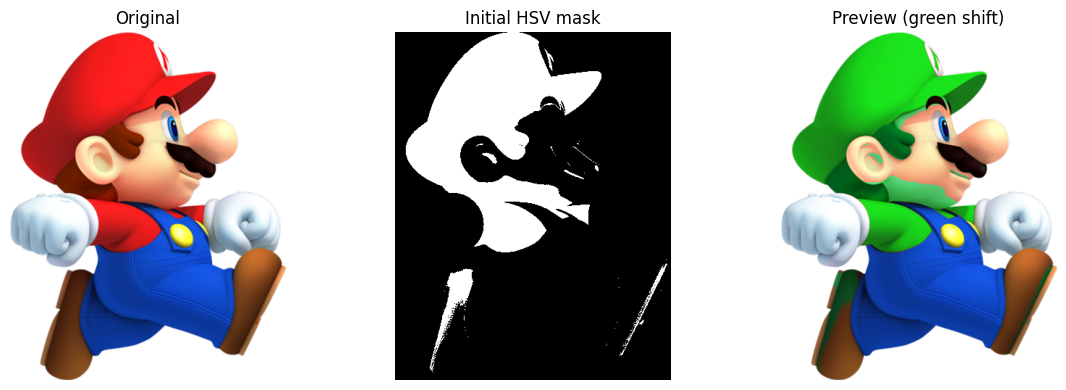

In [75]:
from PIL import Image

# --- util ---
def load_rgba(path):
    img = Image.open(path).convert("RGBA")
    arr = np.asarray(img).astype(np.float32)/255.0
    return arr
def save_rgba(path, arr):
    arr = np.clip(arr, 0, 1)
    Image.fromarray((arr*255).astype(np.uint8), mode="RGBA").save(path)
def rgba_to_rgb_alpha(a):
    return a[...,:3], a[...,3:4]
def rgb_alpha_to_rgba(rgb, alpha):
    return np.concatenate([rgb, alpha], axis=-1)
def hue_distance(h1, h2):
    diff = abs(h1 - h2)
    return diff if diff <= 0.5 else 1.0 - diff

# call image -> HSV
rgba = load_rgba("mario.png")   # 같은 폴더에 필요
rgb, alpha = rgba_to_rgb_alpha(rgba)
hsv = mcolors.rgb_to_hsv(rgb)
h, s, v = hsv[...,0], hsv[...,1], hsv[...,2]

# initial score
# 보통 red는 h≈0, s 높고 v 중간 increases
tau   = 0.06   # hue distance *allowed (0~1에서 0.06이면 대략 ±22°)
Smin  = 0.55   # 채도 하한
Vmin  = 0.20   # 명도 하한

# create a mask
red_like = np.vectorize(hue_distance)(h, 0.0) < tau   # 빨강 중심 범위
mask = red_like & (s > Smin) & (v > Vmin)

# visualize
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(rgba); axes[0].set_title("Original"); axes[0].axis('off')
axes[1].imshow(mask, cmap='gray'); axes[1].set_title("Initial HSV mask"); axes[1].axis('off')

# check mask w/ green
hsv2 = hsv.copy()
sel = mask
hsv2[...,0][sel] = (hsv2[...,0][sel] + 1/3) % 1.0   # +120°
hsv2[...,2][sel] = hsv2[...,2][sel] * 0.9           # 약간 어둡게(선택)
out = mcolors.hsv_to_rgb(hsv2)
axes[2].imshow(rgb_alpha_to_rgba(out, alpha)); axes[2].set_title("Preview (green shift)"); axes[2].axis('off')
plt.tight_layout(); plt.show()
#*GPT collaborated;

# signal/bkgd가 이미 있으면, 그들의 hue 분포 기반으로 tau 제안
if 'signal' in globals() and 'background' in globals():
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        sig_h = mcolors.rgb_to_hsv((signal/255.0 if signal.max()>1 else signal))[:,0]
        bg_h  = mcolors.rgb_to_hsv((background/255.0 if background.max()>1 else background))[:,0]
    # hue=0; distance
    sig_d = np.vectorize(hue_distance)(sig_h, 0.0)
    bg_d  = np.vectorize(hue_distance)(bg_h, 0.0)

    # sig_d 90 percentile
    tau_suggest = float(np.quantile(sig_d, 0.90))
    # adjust the size
    tau = min(tau, tau_suggest*0.9)



In [76]:
luigi_rgba = rgb_alpha_to_rgba(out, alpha)
save_rgba("luigi_mine.png", luigi_rgba)
print("Saved: luigi_mine.png")
# save pic

Saved: luigi_mine.png


/tmp/ipython-input-2892621675.py:10: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray((arr*255).astype(np.uint8), mode="RGBA").save(path)


### 5.2) Changing Color Without Chaning The Shade

Now that we can detect Mario's cloth. All we need to do now is to change the color of his cloth to "green" ish. This means that all we need to do is to change the hue value from red hue to green hue.

The hue value can be found below. Make sure you divide it by 360 to get it to 0-1 range that matplotlib expect.

<img src="YOBFy.png" style="height:50px"/>

***Your task*** Make `luigi.png`

<img src="luigi.png" style="height:100px"/>

Hint:
  - You will want to convert hsv back to rgb and pad the original alpha backin so you can display it nicely with `imshow`
  - `matplotlib.colors.hsv_to_rgb` is handy.
  - you can copy nparray with `nparray.copy()`
  - if you want a darker shade scale `value` component down a little bit.




/tmp/ipython-input-1002804327.py:8: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray((arr*255).astype(np.uint8), mode="RGBA").save(path)


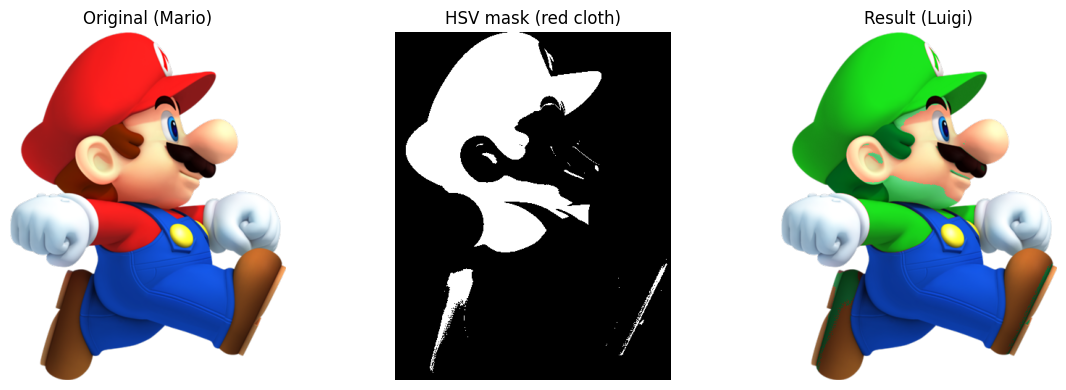

Saved: luigi_mine.png


In [78]:
# utils
def load_rgba(path):
    img = Image.open(path).convert("RGBA")
    return np.asarray(img).astype(np.float32) / 255.0

def save_rgba(path, arr):
    arr = np.clip(arr, 0, 1)
    Image.fromarray((arr*255).astype(np.uint8), mode="RGBA").save(path)

def rgba_to_rgb_alpha(a):
    return a[...,:3], a[...,3:4]

def rgb_alpha_to_rgba(rgb, alpha):
    return np.concatenate([rgb, alpha], axis=-1)

def hue_distance(h1, h2):
    diff = abs(h1 - h2)
    return diff if diff <= 0.5 else 1.0 - diff

def shift_hue(hsv, delta_h, sat_scale=1.0, val_scale=1.0):
    h = (hsv[...,0] + delta_h) % 1.0
    s = np.clip(hsv[...,1] * sat_scale, 0, 1)
    v = np.clip(hsv[...,2] * val_scale, 0, 1)
    return np.stack([h, s, v], axis=-1)

def red_mask_from_hsv(hsv, tau=0.06, s_min=0.55, v_min=0.20):
    """
    tau: circular hue distance threshold from red (0.06 ≈ ±22°)
    s_min, v_min: thresholds to suppress gray/dark areas
    """
    h = hsv[...,0]; s = hsv[...,1]; v = hsv[...,2]
    red_like = np.vectorize(hue_distance)(h, 0.0) < tau
    return red_like & (s > s_min) & (v > v_min)

# pipeline**
rgba = load_rgba("mario.png")
rgb, alpha = rgba_to_rgb_alpha(rgba)
hsv = mcolors.rgb_to_hsv(rgb)

mask = red_mask_from_hsv(hsv, tau=0.06, s_min=0.55, v_min=0.20)

# Sol 1, fixed +120° hue shift (red -> green) using the same method as I previously used above.
hsv_shifted = hsv.copy()
hsv_shifted[mask] = shift_hue(hsv[mask], delta_h=1/3, sat_scale=1.0, val_scale=0.90)

# Method B (optional): retarget to a swatch hue
# target_hue_deg = 120.0
# target_h = target_hue_deg / 360.0
# h_src = hsv[...,0][mask]
# if h_src.size > 0:
#     ang = np.exp(2j*np.pi*h_src)
#     mean_ang = np.angle(ang.mean())
#     if mean_ang < 0: mean_ang += 2*np.pi
#     src_mean = mean_ang / (2*np.pi)
#     delta = (target_h - src_mean) % 1.0
#     hsv_shifted[mask] = shift_hue(hsv[mask], delta_h=delta, sat_scale=1.0, val_scale=0.90)

rgb_out = mcolors.hsv_to_rgb(hsv_shifted)
luigi_rgba = rgb_alpha_to_rgba(rgb_out, alpha)
save_rgba("luigi_mine.png", luigi_rgba)

fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(rgba); axes[0].set_title("Original (Mario)"); axes[0].axis('off')
axes[1].imshow(mask, cmap='gray'); axes[1].set_title("HSV mask (red cloth)"); axes[1].axis('off')
axes[2].imshow(luigi_rgba); axes[2].set_title("Result (Luigi)"); axes[2].axis('off')
plt.tight_layout(); plt.show()

print("Saved: luigi_mine.png")
# gpt collab**